In [38]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [140]:
df1 = pd.read_csv('./data/prices_round_2_day_-1.csv', sep=';')
df2 = pd.read_csv('./data/prices_round_2_day_0.csv', sep=';')
df3 = pd.read_csv('./data/prices_round_2_day_1.csv', sep=';')

In [141]:
# first concatenate the dataframes
df = pd.concat([df1, df2, df3])

In [142]:
# have what?
# croissants CST, jams JAM, djembe DJE
# squid ink SQI, kelp KLP, rainfoest resin RAR
# picnic baskets PB1, PB2
CST = 'CROISSANTS'
JAM = 'JAMS'
DJE = 'DJEMBES'
SQI = 'SQUID_INK'
KLP = 'KELP'
RAR = 'RAINFOREST_RESIN'
PB1 = 'PICNIC_BASKET1'
PB2 = 'PICNIC_BASKET2'

products = [CST, JAM, DJE, SQI, KLP, RAR, PB1, PB2]

data = {}
indices = list(range(30000))
for product in products:
    data[product] = df[df['product'] == product]
    (data[product])['index'] = data[product].apply(lambda x: (x['day'] + 1) * 10000 + x['timestamp'] // 100, axis=1)
    data[product].set_index(['index'], inplace=True)
    data[product].drop(['day', 'timestamp', 'product'], axis=1, inplace=True)

C:\Users\Alex\AppData\Local\Temp\ipykernel_19564\1832854608.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (data[product])['index'] = data[product].apply(lambda x: (x['day'] + 1) * 10000 + x['timestamp'] // 100, axis=1)
C:\Users\Alex\AppData\Local\Temp\ipykernel_19564\1832854608.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[product].drop(['day', 'timestamp', 'product'], axis=1, inplace=True)
C:\Users\Alex\AppData\Local\Temp\ipykernel_19564\1832854608.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

       bid_price_1  bid_volume_1  bid_price_2  bid_volume_2  bid_price_3  \
index                                                                      
0            13450            55          NaN           NaN          NaN   
1            13449            57          NaN           NaN          NaN   
2            13450            20      13449.0          31.0          NaN   
3            13449            73          NaN           NaN          NaN   
4            13452            78          NaN           NaN          NaN   
...            ...           ...          ...           ...          ...   
29995        13418            25      13417.0          41.0          NaN   
29996        13417            58          NaN           NaN          NaN   
29997        13417            61          NaN           NaN          NaN   
29998        13417            60          NaN           NaN          NaN   
29999        13419            70          NaN           NaN          NaN   

       bid_

<Axes: xlabel='index'>

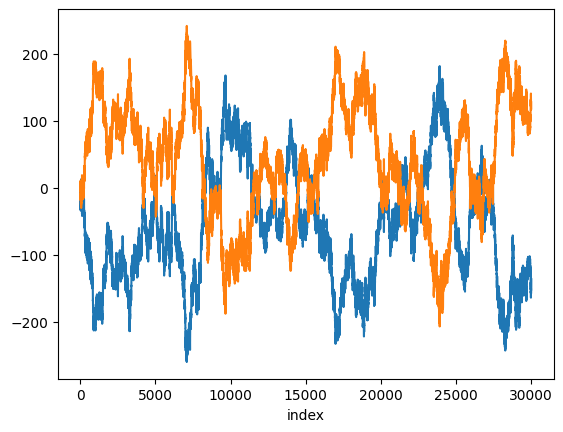

In [143]:
# now have all the price data
# position limits:
# CST: 250
# JAM: 350
# DJE: 60
# PB1: 60
# PB2: 100

# PB1 = 6 * CST + 3 * JAM + 1 * DJE
# PB2 = 4 * CST + 2 * JAM

print(data[DJE])

long_pb1_profit = 6 * data[CST]['bid_price_1'] + 3 * data[JAM]['bid_price_1'] + 1 * data[DJE]['bid_price_1'] - data[PB1]['ask_price_1']
short_pb1_profit = data[PB1]['bid_price_1'] - (6 * data[CST]['ask_price_1'] + 3 * data[JAM]['ask_price_1'] + 1 * data[DJE]['ask_price_1'])

fig, ax = plt.subplots()
long_pb1_profit.plot(ax=ax)
short_pb1_profit.plot(ax=ax)

       bid_price_1  bid_volume_1  bid_price_2  bid_volume_2  bid_price_3  \
index                                                                      
0            30606            20      30605.0          18.0          NaN   
1            30610            17      30609.0          20.0          NaN   
2            30612            13      30611.0          20.0          NaN   
3            30618             2      30617.0          41.0          NaN   
4            30620             2      30619.0          43.0          NaN   
...            ...           ...          ...           ...          ...   
29995        30115            18      30114.0          25.0          NaN   
29996        30112            47          NaN           NaN          NaN   
29997        30111             1      30110.0          45.0          NaN   
29998        30110             2      30109.0          41.0          NaN   
29999        30100            36          NaN           NaN          NaN   

       bid_

<Axes: xlabel='index'>

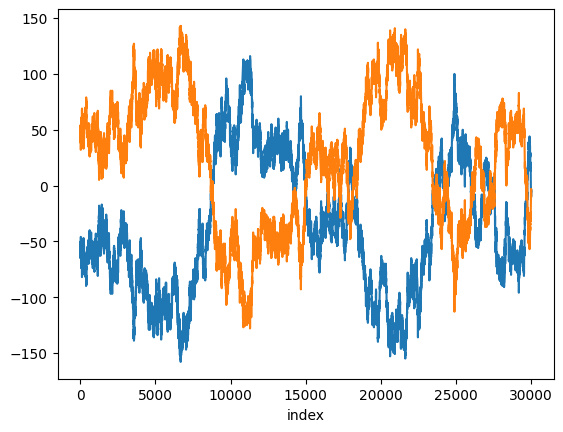

In [64]:
long_pb2_profit = 4 * data[CST]['bid_price_1'] + 2 * data[JAM]['bid_price_1'] - data[PB2]['ask_price_1']
short_pb2_profit = data[PB2]['bid_price_1'] - (4 * data[CST]['ask_price_1'] + 2 * data[JAM]['ask_price_1'])
fig, ax = plt.subplots()
long_pb2_profit.plot(ax=ax)
short_pb2_profit.plot(ax=ax)

<Axes: xlabel='index'>

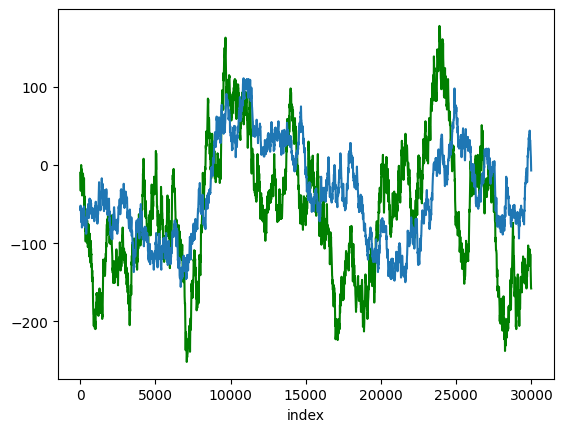

In [65]:
T = range(0, 30000, 10)
fig, ax = plt.subplots()
long_pb1_profit[T].plot(color='g',ax=ax)
long_pb2_profit[T].plot(ax=ax)

It seems to me that the two are quite strongly correlated!

In [71]:
df_feedback = pd.read_csv('./feedback/4460f6ba-3ecb-47fc-8ba4-c019a36ce548.csv', sep=';')

In [72]:
import ast

with open('./feedback/trades.txt') as f:
    trade_data = ast.literal_eval(f.read())

In [73]:
'''
CST = 'CROISSANTS'
JAM = 'JAMS'
DJE = 'DJEMBES'
SQI = 'SQUID_INK'
KLP = 'KELP'
RAR = 'RAINFOREST_RESIN'
PB1 = 'PICNIC_BASKET1'
PB2 = 'PICNIC_BASKET2'
'''
prices = {}
for S in products:
    prices[S] = df_feedback[df_feedback['product'] == S]['mid_price']
    prices[S].index = range(1000)

     mid_price  profit_and_loss  position  index_price
0      58710.5          0.00000         0         25.0
1      58713.0          0.00000         0         25.0
2      58711.5          0.00000         0         21.5
3      58710.5          0.00000         0         21.0
4      58703.5          0.00000         0         23.0
..         ...              ...       ...          ...
995    58578.0       1607.25000        -6         40.0
996    58576.5       1614.75000        -6         39.0
997    58574.5       1629.78125        -6         39.0
998    58573.0       1636.62500        -6         37.5
999    58563.5       1693.93750        -6         37.5

[1000 rows x 4 columns]


<Axes: >

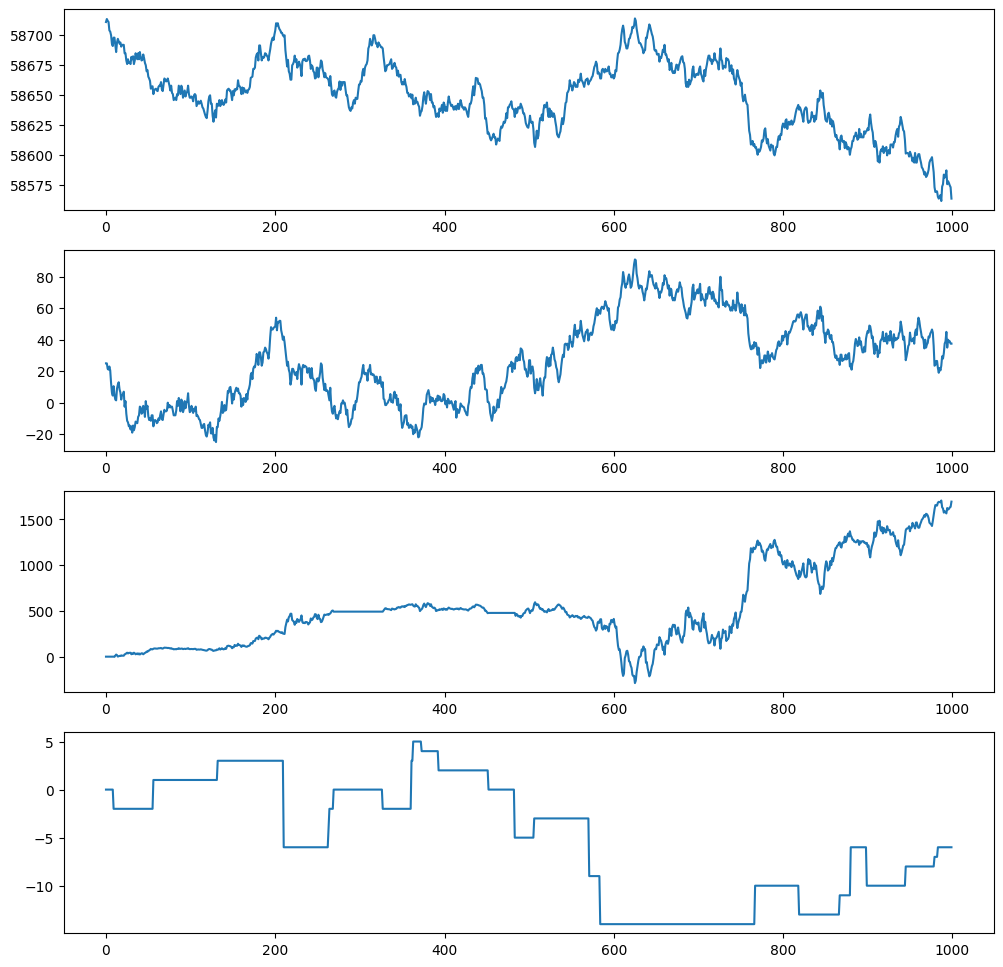

In [74]:
position_change = [0] * 1000

PB1_index_price = prices[PB1] - 6 * prices[CST] - 3 * prices[JAM] - prices[DJE]
PB2_index_price = prices[PB2] - 4 * prices[CST] - 2 * prices[JAM]


ACTIVE_SYMBOL = PB1
index_price = PB1_index_price


for d in trade_data:
    t = d['timestamp'] // 100
    S = d['symbol']
    if (S == ACTIVE_SYMBOL):
        if (d['buyer'] == 'SUBMISSION'):
            position_change[t] += d['quantity']
        if (d['seller'] == 'SUBMISSION'):
            position_change[t] -= d['quantity']

for i in range(1, 1000):
    position_change[i] += position_change[i-1]


df_feedback_ACT = df_feedback[df_feedback['product'] == ACTIVE_SYMBOL][['mid_price', 'profit_and_loss']]

df_feedback_ACT.index = list(range(1000))
df_feedback_ACT['position'] = position_change
df_feedback_ACT['index_price'] = index_price

print(df_feedback_ACT)

fig, ax = plt.subplots(4, 1, figsize=(12,12))
df_feedback_ACT['mid_price'].plot(ax=ax[0])
df_feedback_ACT['index_price'].plot(ax=ax[1])
df_feedback_ACT['profit_and_loss'].plot(ax=ax[2])
df_feedback_ACT['position'].plot(ax=ax[3])

<Axes: >

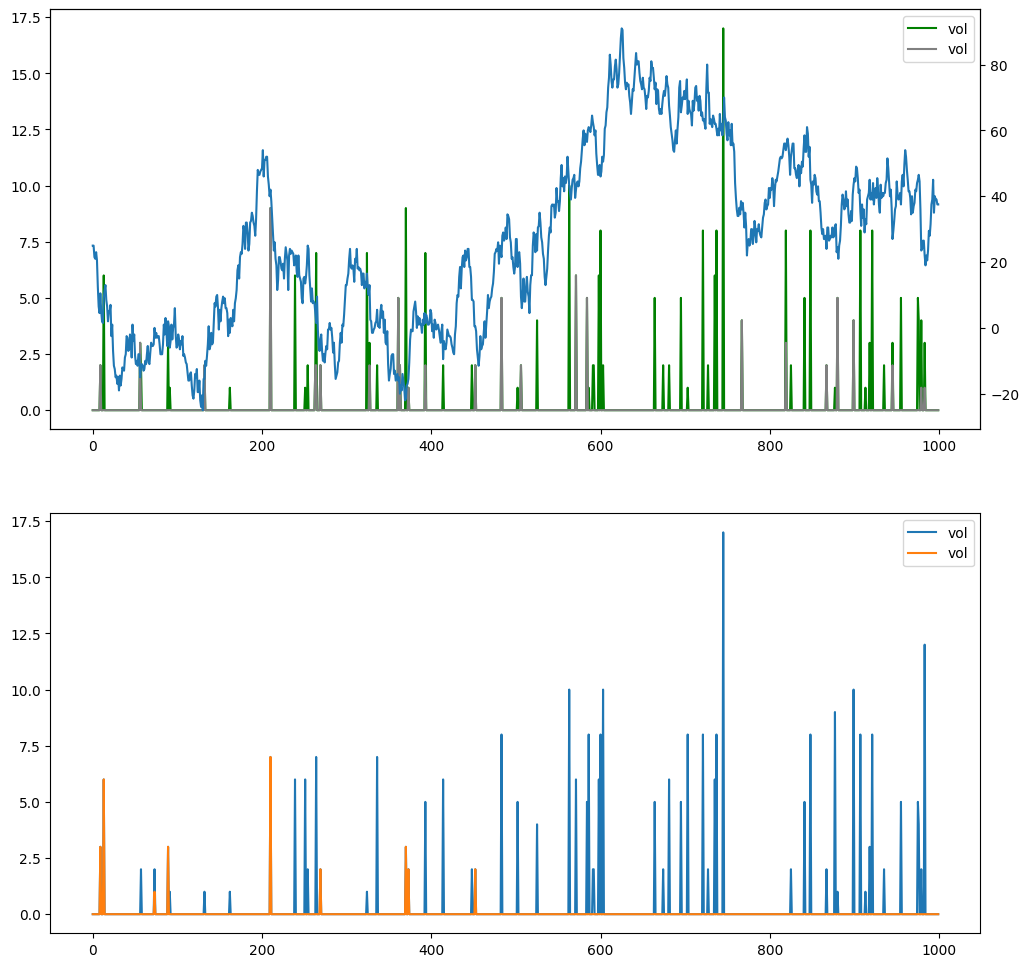

In [75]:
T = 1000

trade_volumes = {}
my_trade_volumes = {}
for S in products:
    trade_volumes[S] = pd.DataFrame({'vol': [0] * T})
    my_trade_volumes[S] = pd.DataFrame({'vol': [0] * T})
for d in trade_data:
    t = d['timestamp'] // 100
    S = d['symbol']
    trade_volumes[S].iloc[t] += d['quantity']
    if (d['buyer'] == 'SUBMISSION' or d['seller'] == 'SUBMISSION'):
        my_trade_volumes[S].iloc[t] += d['quantity']
'''
for S in products:
    for t in range(1, T):
        trade_volumes[S].iloc[t] += trade_volumes[S].iloc[t-1]
        my_trade_volumes[S].iloc[t] += my_trade_volumes[S].iloc[t-1]
'''     
fig, ax = plt.subplots(2, 1, figsize=(12,12))
ax2 = ax[0].twinx()
df_feedback_ACT['index_price'].plot(ax=ax2)
trade_volumes[PB1].plot(color='g',ax=ax[0])
my_trade_volumes[PB1].plot(color='grey',ax=ax[0])
trade_volumes[PB2].plot(ax=ax[1])
my_trade_volumes[PB2].plot(ax=ax[1])

In [76]:
print(df_feedback)

      day  timestamp           product  bid_price_1  bid_volume_1  \
0       1          0         SQUID_INK         1835             1   
1       1          0    PICNIC_BASKET1        58706             1   
2       1          0    PICNIC_BASKET2        30252            11   
3       1          0  RAINFOREST_RESIN         9992            35   
4       1          0              KELP         2032            23   
...   ...        ...               ...          ...           ...   
7995    1      99900              JAMS         6515           175   
7996    1      99900         SQUID_INK         1891            28   
7997    1      99900  RAINFOREST_RESIN         9992            34   
7998    1      99900           DJEMBES        13366            78   
7999    1      99900              KELP         2033            28   

      bid_price_2  bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  \
0          1834.0          22.0          NaN           NaN         1837   
1         58705.0    

      day  timestamp           product  bid_price_1  bid_volume_1  \
0       1          0         SQUID_INK         1835             1   
1       1          0    PICNIC_BASKET1        58706             1   
2       1          0    PICNIC_BASKET2        30252            11   
3       1          0  RAINFOREST_RESIN         9992            35   
4       1          0              KELP         2032            23   
...   ...        ...               ...          ...           ...   
7995    1      99900              JAMS         6515           175   
7996    1      99900         SQUID_INK         1891            28   
7997    1      99900  RAINFOREST_RESIN         9992            34   
7998    1      99900           DJEMBES        13366            78   
7999    1      99900              KELP         2033            28   

      bid_price_2  bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  \
0          1834.0          22.0          NaN           NaN         1837   
1         58705.0    

<Axes: >

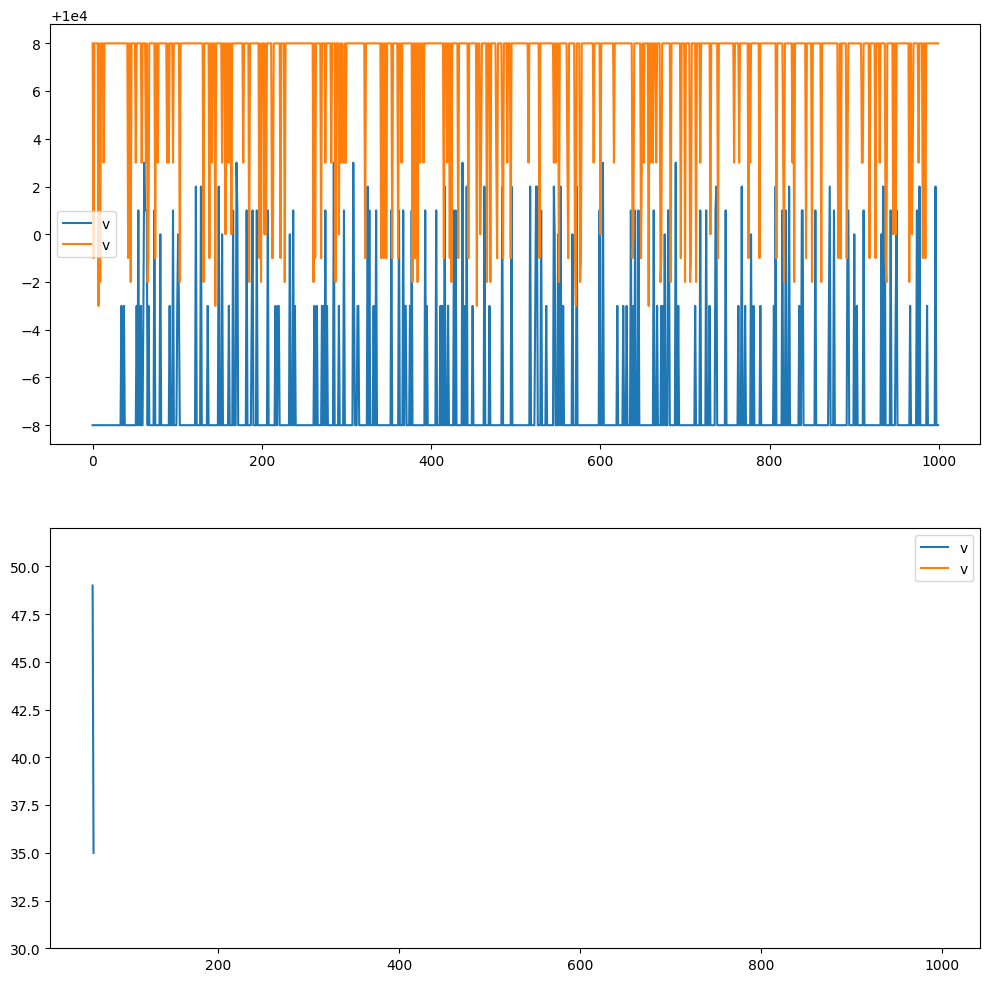

In [77]:
# get also the bid-ask activity
print(df_feedback)
T = 1000
max_bids = {}
bid_volumes = {}
min_asks = {}
ask_volumes = {}
for S in products:
    max_bids[S] = pd.DataFrame({'v': [0] * T})
    min_asks[S] = pd.DataFrame({'v': [0] * T})
    bid_volumes[S] = pd.DataFrame({'v': [0] * T})
    ask_volumes[S] = pd.DataFrame({'v': [0] * T})

cols = ['bid_volume_2', 'bid_volume_3', 'ask_volume_2', 'ask_volume_3']
df[cols] = df[cols].fillna(value=0)
for index, row in df_feedback.iterrows():
    S = row['product']
    t = row['timestamp'] // 100
    max_bids[S].iloc[t] = row['bid_price_1']
    min_asks[S].iloc[t] = row['ask_price_1']
    bid_volumes[S].iloc[t] = row['bid_volume_1'] + row['bid_volume_2'] + row['bid_volume_3']
    ask_volumes[S].iloc[t] = row['ask_volume_1'] + row['ask_volume_2'] + row['ask_volume_3']

# interestingly, picnic baskets do have some spreads to exploit??
# possibly can use some space to 
for S in products:
    spreads = min_asks[S] - max_bids[S]
    print(S)
    print(spreads.describe())

fig, ax = plt.subplots(2,1,figsize=(12,12))
max_bids[RAR].plot(ax=ax[0])
min_asks[RAR].plot(ax=ax[0])
bid_volumes[RAR].plot(ax=ax[1])
ask_volumes[RAR].plot(ax=ax[1])

In [86]:
# ah, lol... the RAR has changed.
RAR_trades = []
volume = 0
delta = 0
for d in trade_data:
    if (d['symbol'] == RAR):
        RAR_trades.append(d['price'])
        volume += d['quantity']
        if (d['price'] == 9992 or d['price'] == 10008):
            delta += abs(d['price'] - 10000) * d['quantity']
print(pd.DataFrame(RAR_trades).describe())
print(volume)
print(delta)

                  0
count    180.000000
mean   10000.161111
std        6.004806
min     9992.000000
25%     9992.000000
50%     9999.000000
75%    10008.000000
max    10008.000000
609
3200


In [89]:
print(trade_data)

[{'timestamp': 0, 'buyer': '', 'seller': '', 'symbol': 'CROISSANTS', 'currency': 'SEASHELLS', 'price': 4274, 'quantity': 8}, {'timestamp': 100, 'buyer': '', 'seller': '', 'symbol': 'RAINFOREST_RESIN', 'currency': 'SEASHELLS', 'price': 9999, 'quantity': 1}, {'timestamp': 200, 'buyer': '', 'seller': '', 'symbol': 'CROISSANTS', 'currency': 'SEASHELLS', 'price': 4276, 'quantity': 8}, {'timestamp': 200, 'buyer': '', 'seller': '', 'symbol': 'JAMS', 'currency': 'SEASHELLS', 'price': 6543, 'quantity': 7}, {'timestamp': 200, 'buyer': '', 'seller': '', 'symbol': 'KELP', 'currency': 'SEASHELLS', 'price': 2034, 'quantity': 1}, {'timestamp': 200, 'buyer': '', 'seller': '', 'symbol': 'SQUID_INK', 'currency': 'SEASHELLS', 'price': 1841, 'quantity': 1}, {'timestamp': 300, 'buyer': '', 'seller': '', 'symbol': 'KELP', 'currency': 'SEASHELLS', 'price': 2032, 'quantity': 1}, {'timestamp': 300, 'buyer': '', 'seller': '', 'symbol': 'SQUID_INK', 'currency': 'SEASHELLS', 'price': 1841, 'quantity': 1}, {'times

In [91]:
# investigate the discrepancy from mid price that the baskets are traded at
# get also the bid-ask activity
print(df_feedback)
T = 1000
max_bids = {}
bid_volumes = {}
min_asks = {}
ask_volumes = {}
for S in products:
    max_bids[S] = pd.DataFrame({'v': [0] * T})
    min_asks[S] = pd.DataFrame({'v': [0] * T})
    bid_volumes[S] = pd.DataFrame({'v': [0] * T})
    ask_volumes[S] = pd.DataFrame({'v': [0] * T})

cols = ['bid_volume_2', 'bid_volume_3', 'ask_volume_2', 'ask_volume_3']
df[cols] = df[cols].fillna(value=0)
for index, row in df_feedback.iterrows():
    S = row['product']
    t = row['timestamp'] // 100
    max_bids[S].iloc[t] = row['bid_price_1']
    min_asks[S].iloc[t] = row['ask_price_1']
    bid_volumes[S].iloc[t] = row['bid_volume_1'] + row['bid_volume_2'] + row['bid_volume_3']
    ask_volumes[S].iloc[t] = row['ask_volume_1'] + row['ask_volume_2'] + row['ask_volume_3']

# interestingly, picnic baskets do have some spreads to exploit??
# possibly can use some space to 
for S in products:
    spreads = min_asks[S] - max_bids[S]
    print(S)
    print(spreads.describe())

      day  timestamp           product  bid_price_1  bid_volume_1  \
0       1          0         SQUID_INK         1835             1   
1       1          0    PICNIC_BASKET1        58706             1   
2       1          0    PICNIC_BASKET2        30252            11   
3       1          0  RAINFOREST_RESIN         9992            35   
4       1          0              KELP         2032            23   
...   ...        ...               ...          ...           ...   
7995    1      99900              JAMS         6515           175   
7996    1      99900         SQUID_INK         1891            28   
7997    1      99900  RAINFOREST_RESIN         9992            34   
7998    1      99900           DJEMBES        13366            78   
7999    1      99900              KELP         2033            28   

      bid_price_2  bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  \
0          1834.0          22.0          NaN           NaN         1837   
1         58705.0    

In [98]:
S = PB2
volume = 0
delta = 0
for d in trade_data:
    t = d['timestamp'] // 100
    if (d['symbol'] == S):
        volume += d['quantity']
        delta += abs(d['price'] - df_feedback[df_feedback['product'] == S]['mid_price'].iloc[t]) * d['quantity']
print(delta)
print(volume)

670.5
305


In [99]:
for S in {PB1, PB2}:
    spreads = min_asks[S] - max_bids[S]
    print(S)
    print(spreads.describe())

PICNIC_BASKET2
                 v
count  1000.000000
mean      5.196000
std       1.056741
min       1.000000
25%       5.000000
50%       5.000000
75%       6.000000
max       7.000000
PICNIC_BASKET1
                v
count  1000.00000
mean      9.17400
std       1.97576
min       1.00000
25%       9.00000
50%       9.00000
75%      11.00000
max      11.00000


count    30000.000000
mean       -48.762433
std         85.119451
min       -251.000000
25%       -112.500000
50%        -51.000000
75%          5.000000
max        194.500000
Name: mid_price, dtype: float64
count    30000.000000
mean       -30.235967
std         59.849200
min       -149.500000
25%        -75.000000
50%        -38.500000
75%         22.000000
max        120.500000
Name: mid_price, dtype: float64


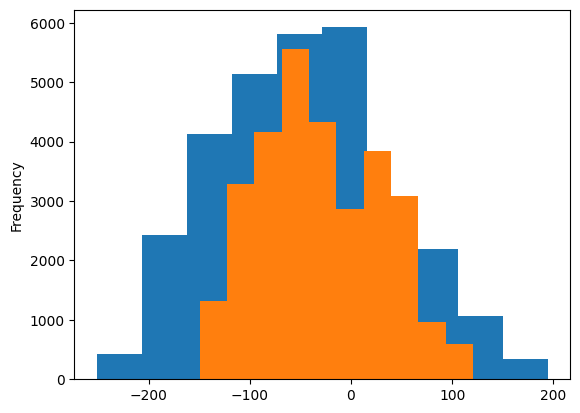

In [112]:
PB1_index_price_full = 6 * data[CST]['mid_price'] + 3 * data[JAM]['mid_price'] + data[DJE]['mid_price'] - data[PB1]['mid_price']
PB2_index_price_full = 4 * data[CST]['mid_price'] + 2 * data[JAM]['mid_price'] - data[PB2]['mid_price']

fig, ax = plt.subplots()
PB1_index_price_full.plot.hist(ax=ax)
PB2_index_price_full.plot.hist(ax=ax)
print(PB1_index_price_full.describe())
print(PB2_index_price_full.describe())

Let's investigate the current terrain...

In [114]:
df_feedback2 = pd.read_csv('./feedback/432beda2-c41b-427d-800b-809979c648dd.csv', sep=';')
with open('./feedback/trade2.txt') as f:
    trade2 = ast.literal_eval(f.read())

In [116]:
print(trade2)

[{'timestamp': 0, 'buyer': '', 'seller': '', 'symbol': 'CROISSANTS', 'currency': 'SEASHELLS', 'price': 4274, 'quantity': 8}, {'timestamp': 100, 'buyer': '', 'seller': '', 'symbol': 'RAINFOREST_RESIN', 'currency': 'SEASHELLS', 'price': 9999, 'quantity': 1}, {'timestamp': 200, 'buyer': '', 'seller': 'SUBMISSION', 'symbol': 'KELP', 'currency': 'SEASHELLS', 'price': 2034, 'quantity': 1}, {'timestamp': 200, 'buyer': '', 'seller': '', 'symbol': 'CROISSANTS', 'currency': 'SEASHELLS', 'price': 4276, 'quantity': 8}, {'timestamp': 200, 'buyer': '', 'seller': '', 'symbol': 'JAMS', 'currency': 'SEASHELLS', 'price': 6543, 'quantity': 7}, {'timestamp': 200, 'buyer': '', 'seller': '', 'symbol': 'SQUID_INK', 'currency': 'SEASHELLS', 'price': 1841, 'quantity': 1}, {'timestamp': 300, 'buyer': '', 'seller': '', 'symbol': 'KELP', 'currency': 'SEASHELLS', 'price': 2032, 'quantity': 1}, {'timestamp': 300, 'buyer': '', 'seller': '', 'symbol': 'SQUID_INK', 'currency': 'SEASHELLS', 'price': 1841, 'quantity': 1

In [126]:
T = 1000

positions = {}
volumes = {}
my_volumes = {}
for S in products:
    positions[S] = pd.DataFrame({'v': [0] * T})
    volumes[S] = pd.DataFrame({'v': [0] * T})
    my_volumes[S] = pd.DataFrame({'v': [0] * T})
for d in trade2:
    S = d['symbol']
    t = d['timestamp'] // 100
    volumes[S].iloc[t] += d['quantity']
    if (d['buyer'] == 'SUBMISSION'):
        positions[S].iloc[t] += d['quantity']
        my_volumes[S].iloc[t] += d['quantity']
    elif (d['seller'] == 'SUBMISSION'):
        positions[S].iloc[t] -= d['quantity']
        my_volumes[S].iloc[t] += d['quantity']

for S in products:
    for i in range(1, T):
        positions[S].iloc[i] += positions[S].iloc[i-1]
        volumes[S].iloc[i] += volumes[S].iloc[i-1]
        my_volumes[S].iloc[i] += my_volumes[S].iloc[i-1]
        

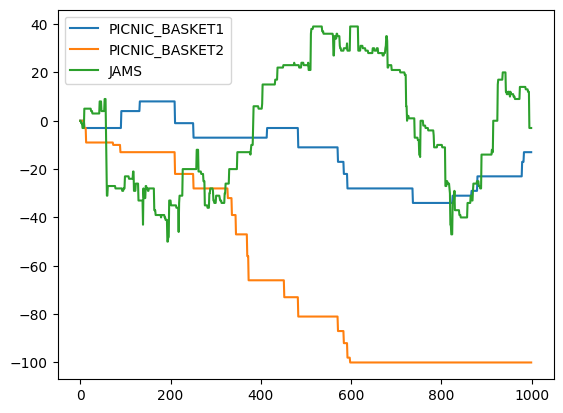

In [161]:
fig, ax = plt.subplots()
positions[PB1].plot(ax=ax)
positions[PB2].plot(ax=ax)
ax.legend([PB1,PB2,JAM])

<Axes: >

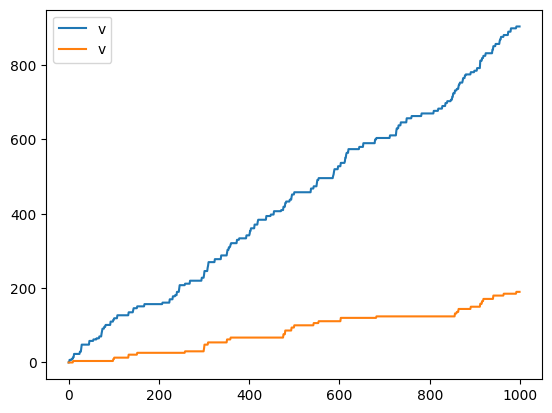

In [134]:
fig, ax = plt.subplots()
volumes[JAM].plot(ax=ax)
my_volumes[JAM].plot(ax=ax)

<Axes: xlabel='index'>

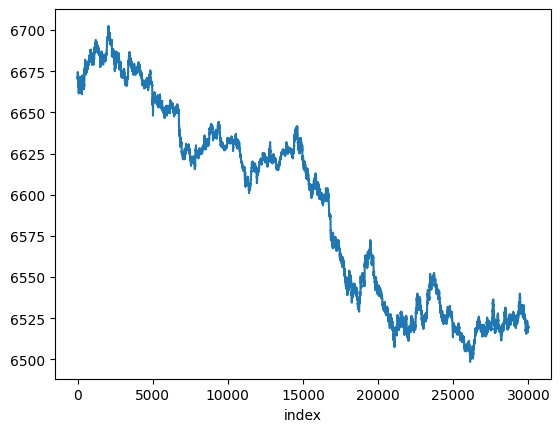

In [136]:
data[JAM]['mid_price'].plot()

<Axes: xlabel='index'>

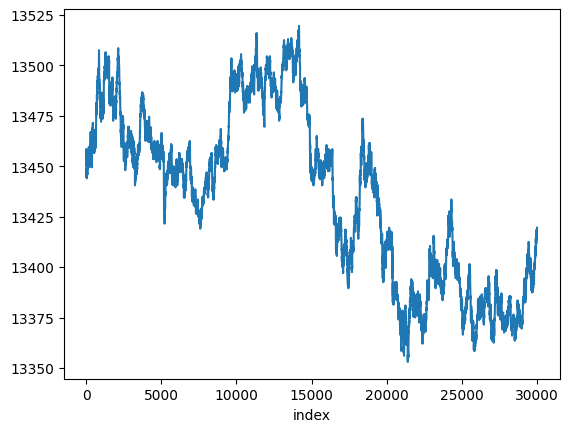

In [137]:
data[DJE]['mid_price'].plot()

<Axes: xlabel='index'>

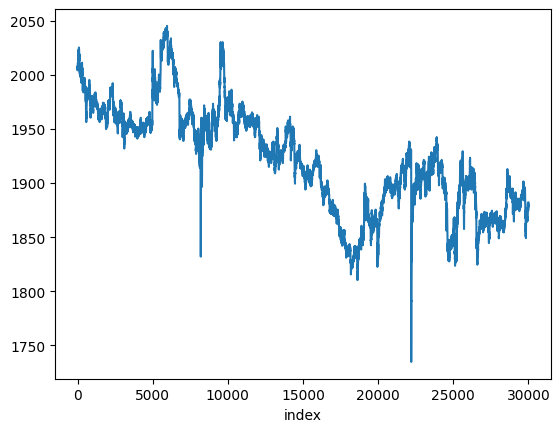

In [162]:
data[SQI]['mid_price'].plot()

In [152]:
feedback = {}
for S in products:
    feedback[S] = df_feedback[df_feedback['product'] == S]
    feedback[S].index = range(1000)
    feedback[S].drop(columns=['day', 'timestamp', 'product'], inplace=True)
    print(feedback[S])

     bid_price_1  bid_volume_1  bid_price_2  bid_volume_2  bid_price_3  \
0           4274           123          NaN           NaN          NaN   
1           4275            48       4274.0          54.0          NaN   
2           4275            62       4274.0          50.0          NaN   
3           4275            36       4274.0          73.0          NaN   
4           4274           107          NaN           NaN          NaN   
..           ...           ...          ...           ...          ...   
995         4269           120          NaN           NaN          NaN   
996         4269           143          NaN           NaN          NaN   
997         4269           101          NaN           NaN          NaN   
998         4269            52       4268.0          51.0          NaN   
999         4268           102          NaN           NaN          NaN   

     bid_volume_3  ask_price_1  ask_volume_1  ask_price_2  ask_volume_2  \
0             NaN         4276      

C:\Users\Alex\AppData\Local\Temp\ipykernel_19564\1677171877.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feedback[S].drop(columns=['day', 'timestamp', 'product'], inplace=True)
C:\Users\Alex\AppData\Local\Temp\ipykernel_19564\1677171877.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feedback[S].drop(columns=['day', 'timestamp', 'product'], inplace=True)
C:\Users\Alex\AppData\Local\Temp\ipykernel_19564\1677171877.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [159]:
pd.options.display.max_rows = 200
print(feedback[SQI].head(200))

     bid_price_1  bid_volume_1  bid_price_2  bid_volume_2  bid_price_3  \
0           1835             1       1834.0          22.0          NaN   
1           1836            26          NaN           NaN          NaN   
2           1841             1       1839.0          32.0          NaN   
3           1841            27          NaN           NaN          NaN   
4           1842            30          NaN           NaN          NaN   
5           1838            22          NaN           NaN          NaN   
6           1838            25          NaN           NaN          NaN   
7           1834            28          NaN           NaN          NaN   
8           1833            28          NaN           NaN          NaN   
9           1834            21          NaN           NaN          NaN   
10          1835            30          NaN           NaN          NaN   
11          1836            30          NaN           NaN          NaN   
12          1836            29        